In [2]:
import numpy as np

In [3]:
from quantum.Quantum import QuantumRegressor
from main import *

In [4]:
os.getcwd()

'/home/grierjones/funct_error_mitigation/linear/TREX'

In [5]:
# save_path = './MITIQ_ZNE_Richardson/IQP_Full-Pauli-CRX/'
save_path = './TREX/IQP_Full-Pauli-CRX/'
# settings = 'IQP_Full-Pauli-CRX/IQP_Full-Pauli-CRX.json'
settings = './IQP_Full-Pauli-CRX/IQP_Full-Pauli-CRX.json'


train_set = 'linear_train.bin'
test_set = 'linear_test.bin'
scalerpath = 'linear_scaler.bin'


# train_set = '5_DDCC_train.bin'
# test_set = '5_DDCC_test.bin'
# scalerpath = '5_DDCC_scaler.bin'

# train_set = 'PCA16_Morgan_train.bin'
# test_set = 'PCA16_Morgan_test.bin'
# scalerpath = 'PCA16_Morgan_scaler.bin'



Loading dataset from linear_train.bin... 
Successfully loaded linear_train.bin into X and y data. 
Loading dataset from linear_test.bin... 
Successfully loaded linear_test.bin into X and y data. 
Training model with dataset linear_train.bin 
 at time Sun Aug 11 13:48:13 2024... 
(80, 1) (80, 1) (10, 1) (10, 1)


/home/grierjones/miniconda3/envs/qml_min/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/grierjones/miniconda3/envs/qml_min/lib/python3.12/site-packages/pennylane_qiskit/qiskit_device.py:177: UserWarning: The analytic calculation of expectations, variances and probabilities is only supported on statevector backends, not on the <qiskit_ibm_runtime.fake_provider.backends.cairo.fake_cairo.FakeCairoV2 object at 0x7fcc53339c70>. Such statistics obtained from this device are estimates based on samples.
  warnings.warn(self.analytic_warning_message.format(backend), UserWarning)


[Sun Aug 11 13:49:03 2024]  Iteration number: 0 with current cost as 0.8676869271913347 and parameters 
[-2.91925597  2.22136211 -2.14035216 -0.1004585 ]. 
Step 0: cost = 0.8740
Time = 50.4717 s
Training complete taking 50.492064476013184 total seconds. 
Now scoring model... 
Scoring complete taking 14.166969299316406 seconds. 


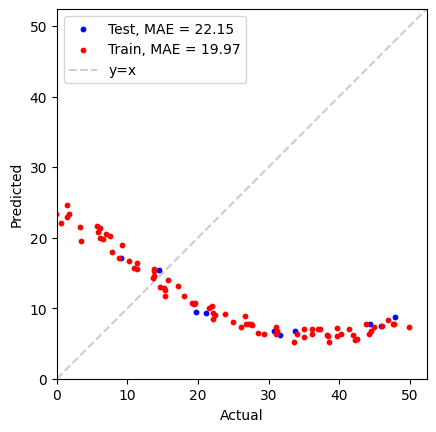

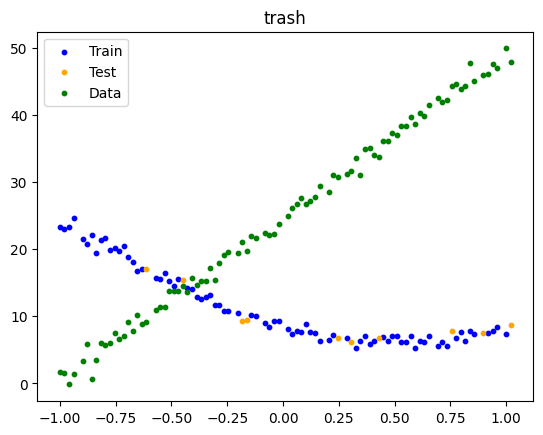

In [6]:
X_train, y_train = load_dataset(train_set)
parse_settings(settings)
if DEVICE == 'qiskit.ibmq':
    save_token(instance, token)

global NUM_QUBITS
global X_DIM
if NUM_QUBITS is not None:
    X_DIM = NUM_QUBITS
elif X_DIM == 1:  # if X_DIM is None and num_qubits wasn't specified anywhere use a default value of 2.
    NUM_QUBITS = 2
    X_DIM = NUM_QUBITS

kwargs = create_kwargs()



if test_set is not None:
    X_test, y_test = load_dataset(test_set)
else:
    X_test, y_test = None, None
    
with open(scalerpath,'rb') as f:
    scaler = joblib.load(f)

print(f'Training model with dataset {train_set} \n at time {time.asctime()}... ')
st = time.time()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
model = QuantumRegressor(**kwargs)
model.fit(X_train, y_train)
hyperparams = None
et = time.time()
print(f'Training complete taking {et - st} total seconds. ')

scores, test_pred, train_pred = evaluate(model, X_train, y_train, X_test, y_test, plot=True,title="trash",y_scaler=scaler)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
(9714.885782718658 / 60) / 60